# My Neural Network

In this project I want to build a neural network myself from scratch. I.e. not using keras or tensorflow or the like. I will only rely on numpy. At the same time I want to practice my general software development skills so I am going to write my own python package: jacobnet. This contains classes for neurons, layers and networks and is unit tested. 

The package and tests can be found in this repository.

Currently my network can feedforward data and update the weights for single training examples. (I need to update it to deal with batches of data.) Below is an example of it's current functionality. 

In [1]:
import jacobnet as jn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create network instance with input size 10, hidden layers of size 10 and 5 and an output layer of size 2. 
net = jn.network.Network(input_size=10, layer_sizes = [10,5,2], seed=None)

I won't train on any meaningful data yet but I can see that the backpropagation is working by using some dummy features and labels.

In [3]:
input_array = np.random.random(10)
target_output = np.random.random(2)

In [4]:
# propagate the input forward through the network
output = net.forward(input_array)

In [5]:
print('Target output is:', target_output)
print('Actual output is:', output)
c0 = jn.utils.cost(target_output, output)
print('The cost for this output is:', c0)

Target output is: [0.14311834 0.41264828]
Actual output is: [0.27054863 0.59196225]
The cost for this output is: 0.024195988741744417


Now I will update the network using backpropagation for this single training example and keep track of the cost after each iteration.

In [6]:
costs = [c0]
learning_rate = 0.01
n = 0
while n < 1000:
    # for backpropagation we need to store the activations of the forward pass
    a_store, z_store = net.forward(input_array, mode='train')
    # get the errors for each layer
    deltas = net.backpropagate(a_store[-1], z_store, target_output)
    # update the weights and biases
    net.update_network(deltas, learning_rate, a_store, input_array)
    # feedforward and calculate cost again for new network 
    output = net.forward(input_array, mode='test')
    c = jn.utils.cost(target_output, output)
    costs.append(c)
    n += 1

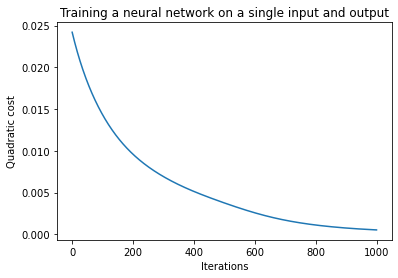

In [7]:
plt.plot(costs)
plt.title('Training a neural network on a single input and output')
plt.xlabel('Iterations')
plt.ylabel('Quadratic cost');

In [8]:
print('Target output is:', target_output)
print('Actual output is:', output)
c = jn.utils.cost(target_output, output)
print('The cost for this output is:', c)

Target output is: [0.14311834 0.41264828]
Actual output is: [0.17223576 0.4266652 ]
The cost for this output is: 0.0005221490164685203


So we can see that the neural network succesfully learnt to produce the target output given the input array. These were just random vectors though. To make this network useful I will need to train on meaningful data and to train the data in batches. I will be updating the jacobnet package to deliver this. 